-----

## Analisis entre variables de diferentes tablas

In [140]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib  # Para poder establecer la version que se maneja, aunque no es necesario importar
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Analizamos las ventas, el inventario inicial y el inventario final.

In [141]:
df_BegInvFINAL = pd.read_csv('Tabla_InventarioInicial.csv',sep=',')

In [142]:
df_EndInvFINAL = pd.read_csv('Tabla_InventarioFinal.csv',sep=',')

In [143]:
df_SalesFINAL = pd.read_csv('SalesFINAL12312016.csv',sep=',')

#### Calculamos el valor del inventario final y el inventario inicial

In [144]:
# Calcular la sumatoria total de la columna 'Valor_total' en df_BegInvFINAL
total_value_beg = df_BegInvFINAL['Valor_total'].sum()
formatted_total_value_beg = f"{total_value_beg:,.2f}"

# Calcular la sumatoria total de la columna 'Valor_total' en df_EndInvFINAL
total_value_end = df_EndInvFINAL['Valor_total'].sum()
formatted_total_value_end = f"{total_value_end:,.2f}"

# Mostrar los resultados
print(f"El valor total de 'Valor_total' en df_BegInvFINAL es: $ {formatted_total_value_beg}")
print(f"El valor total de 'Valor_total' en df_EndInvFINAL es: $ {formatted_total_value_end}")

El valor total de 'Valor_total' en df_BegInvFINAL es: $ 68,053,780.17
El valor total de 'Valor_total' en df_EndInvFINAL es: $ 79,704,851.13


#### Calculamos el valor de las ventas total

In [145]:
# Calcular la sumatoria total de la columna 'SalesDollars'
total_sales_dollars = df_SalesFINAL['SalesDollars'].sum()
formatted_total_sales_dollars = f"{total_sales_dollars:,.2f}"

# Mostrar el resultado
print(f"El valor total de 'SalesDollars' es: $ {formatted_total_sales_dollars}")

El valor total de 'SalesDollars' es: $ 33,139,375.29


#### Graficamos el inventario Inicial, Inventario Final y Ventas Totales

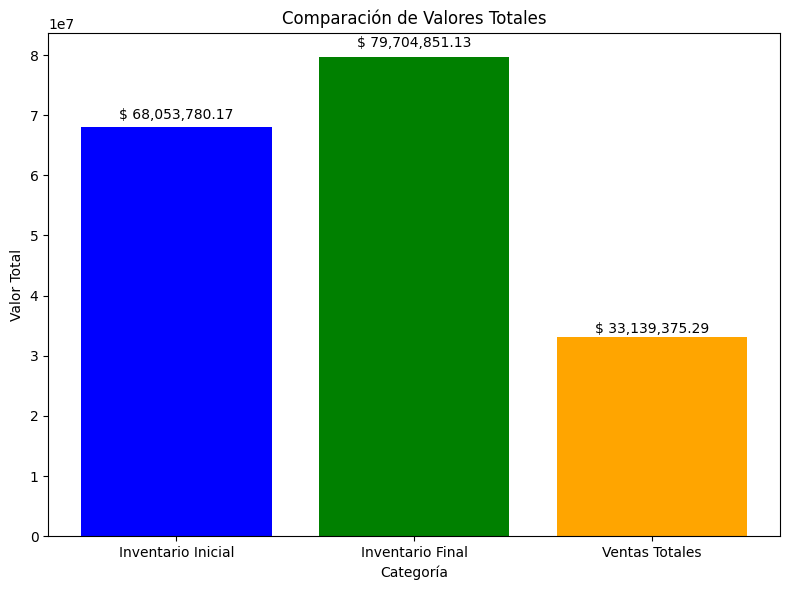

In [146]:
import matplotlib.pyplot as plt

# Datos originales para graficar
labels = ['Inventario Inicial', 'Inventario Final', 'Ventas Totales']
values = [total_value_beg, total_value_end, total_sales_dollars]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])

# Agregar títulos y etiquetas
plt.title('Comparación de Valores Totales')
plt.ylabel('Valor Total')
plt.xlabel('Categoría')

# Mostrar los valores formateados en la parte superior de cada barra
for i, value in enumerate(values):
    formatted_value = f'$ {value:,.2f}'  # Formatear el valor con comas y dos decimales
    plt.text(i, value + 0.02 * value, formatted_value, ha='center')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Se puede apreciar que las Ventas Totales es inferior tanto al inventario inicial, como al inventario final, lo cual nos llama la atencion, pues la empresa tendria inventario para mas de un año de ventas.

### Analizamos los valores totales de compras y detalles compras

In [147]:
df_DetallesCompras = pd.read_csv('PurchasesFINAL12312016.csv',sep=',') #Compras Finales

In [148]:
df_Compras = pd.read_csv('InvoicePurchases12312016.csv',sep=',') #Facturas de compras

Optenemos y graficamos los valores

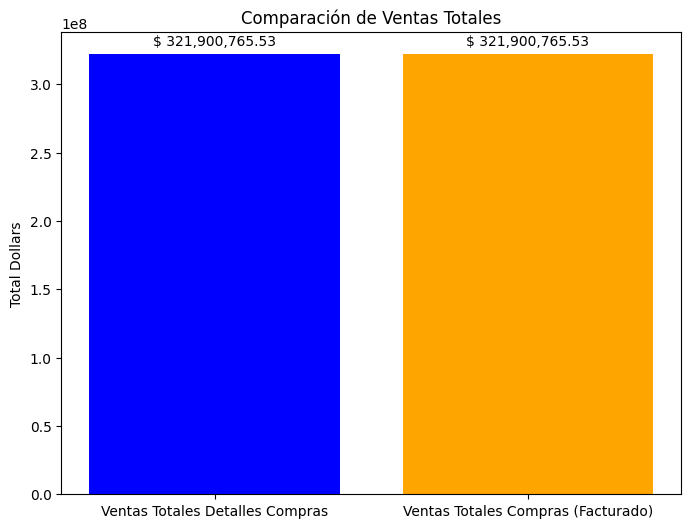

In [149]:
import matplotlib.pyplot as plt

# Calcular la suma total de 'Dollars' en ambos dataframes
total_dollars_detalles_compras = df_DetallesCompras['Dollars'].sum()
total_dollars_compras = df_Compras['Dollars'].sum()
values=[total_dollars_compras,total_dollars_detalles_compras]

# Crear un DataFrame con los totales para facilitar la visualización
totals = {
    'Ventas Totales Detalles Compras': total_dollars_detalles_compras,
    'Ventas Totales Compras (Facturado)': total_dollars_compras
}

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(totals.keys(), totals.values(), color=['blue', 'orange'])

# Añadir título y etiquetas
plt.title('Comparación de Ventas Totales')
plt.ylabel('Total Dollars')

# Mostrar los valores formateados en la parte superior de cada barra
for i, value in enumerate(values):
    formatted_value = f'$ {value:,.2f}'  # Formatear el valor con comas y dos decimales
    plt.text(i, value + 0.02 * value, formatted_value, ha='center')

# Mostrar la gráfica
plt.show()



Podemos determinar que los valores presentan coincidencia.

Al realizar un analisis respecto al movimiento de mercancias, se puede apreciar que existe una gran diferencia pues al tomar el inventario inicial, mas las compras, menos las ventas, deberia ser igual al inventario final, pero existe una diferencia mas de 277 millones. Sin embargo para determinar la verdadera diferencia, debemos hacer una analisis mas exhaustivo, teniendo en cuenta que el valor facturado de las compras es diferente al valor de ventas, por lo que la diferencia sera mayor.

#### Calculamos la diferencia de los datos

Lo primero que haremos es determinar las unidedes por producto (MarcaID o Brand) que ha movido en todo el año 2016 la empresa, para lo cual solo tendremos en cuanta los productos recividos dentro del 1 de enero y el 31 de diciembre de 2016. Motivo por el cual al inventario inicial le adicionaremos los productos que se han comprado fueron recividos dentro del periodo indicado y le restaresmos los productos del inventario final.

In [150]:
# Paso 0: Filtrar las compras recibidas entre el 1 de enero y el 31 de diciembre de 2016
df_DetallesCompras['ReceivingDate'] = pd.to_datetime(df_DetallesCompras['ReceivingDate'])
df_Compras_filtered = df_DetallesCompras[(df_DetallesCompras['ReceivingDate'] >= '2016-01-01') & (df_DetallesCompras['ReceivingDate'] <= '2016-12-31')]

# Paso 1: Agrupamos las unidades disponibles en inventario inicial por MarcaID
unidades_inventario_inicial = df_BegInvFINAL.groupby('MarcaID')['Unidad_disponible'].sum().reset_index()

# Paso 2: Agrupamos las unidades compradas por Brand utilizando el DataFrame filtrado
unidades_compradas = df_Compras_filtered.groupby('Brand')['Quantity'].sum().reset_index()

# Paso 3: Agrupamos las unidades disponibles en inventario final por MarcaID
unidades_inventario_final = df_EndInvFINAL.groupby('MarcaID')['Unidad_disponible'].sum().reset_index()

# Renombramos las columnas para evitar conflictos
unidades_inventario_inicial.rename(columns={'Unidad_disponible': 'Total_Inventario_Inicial'}, inplace=True)
unidades_compradas.rename(columns={'Quantity': 'Total_Compras'}, inplace=True)
unidades_inventario_final.rename(columns={'Unidad_disponible': 'Total_Inventario_Final'}, inplace=True)

# Paso 4: Unimos las tablas por MarcaID/Brand
df_unidades = pd.merge(unidades_inventario_inicial, unidades_compradas, left_on='MarcaID', right_on='Brand', how='left')
df_unidades = pd.merge(df_unidades, unidades_inventario_final, on='MarcaID', how='left')

# Calculamos la diferencia de unidades
df_unidades['Diferencia_Unidades'] = df_unidades['Total_Inventario_Inicial'] + df_unidades['Total_Compras'] - df_unidades['Total_Inventario_Final']

# Paso 5: Incorporamos los precios de compra y venta
precio_compra = df_Compras_filtered.groupby('Brand')['PurchasePrice'].mean().reset_index()
precio_venta = df_BegInvFINAL.groupby('MarcaID')['Precio_venta'].mean().reset_index()

# Unimos la información de precios al DataFrame principal
df_unidades = pd.merge(df_unidades, precio_compra, left_on='MarcaID', right_on='Brand', how='left')
df_unidades = pd.merge(df_unidades, precio_venta, on='MarcaID', how='left')

# Seleccionamos las columnas finales
df_unidades_final = df_unidades[['MarcaID', 'Diferencia_Unidades', 'PurchasePrice', 'Precio_venta']]

# Visualizamos el resultado
df_unidades_final.head()

,MarcaID,Diferencia_Unidades,PurchasePrice,Precio_venta
0,58,3446.0,9.28,12.99
1,60,1775.0,7.40,10.99
2,61,312.0,10.60,13.99
3,62,3125.0,28.67,36.99
4,63,2778.0,30.46,38.99


Teniendo el movimiento del año, pasaremos las unidades a precio de venta.

In [151]:
# Crear una nueva columna 'Valor_Total_Venta' resultante de multiplicar 'Diferencia_Unidades' por 'Precio_venta'
df_unidades_final['Valor_Total_Venta'] = df_unidades_final['Diferencia_Unidades'] * df_unidades_final['Precio_venta']

# Visualizar el resultado
df_unidades_final.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9960\3836134593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidades_final['Valor_Total_Venta'] = df_unidades_final['Diferencia_Unidades'] * df_unidades_final['Precio_venta']


,MarcaID,Diferencia_Unidades,PurchasePrice,Precio_venta,Valor_Total_Venta
0,58,3446.0,9.28,12.99,44763.54
1,60,1775.0,7.40,10.99,19507.25
2,61,312.0,10.60,13.99,4364.88
3,62,3125.0,28.67,36.99,115593.75
4,63,2778.0,30.46,38.99,108314.22


In [152]:
# Calcular la suma total de la columna 'Valor_Total_Venta'
suma_total_valor_venta = df_unidades_final['Valor_Total_Venta'].sum()

# Formatear la suma total con comas para miles y dos decimales
suma_total_valor_venta_formateada = f"{suma_total_valor_venta:,.2f}"

# Mostrar el resultado formateado
print(f"La suma total de 'Valor_Total_Venta' es: $ {suma_total_valor_venta_formateada}")

La suma total de 'Valor_Total_Venta' es: $ 428,600,398.34


De las bodegas de la compañia, salio mercancias por valor de 428,600.938. Seria mas congruete que una compañia como es el caso de ComerLogistics
que tiene un inventario inicial de 68 millones y uno final de 79 millones, venda 428 millones y no 33 millones.

Determinamos la diferencia entre la suma total de lo que la empresa deberia de haber vendido y las ventas totales reportadas en el data frame SalesTotales.

In [153]:
Diferencia_Ventas=suma_total_valor_venta-total_sales_dollars
formatted_Diferencia_Ventas = f"$ {Diferencia_Ventas:,.2f}"
formatted_Diferencia_Ventas

'$ 395,461,023.05'

#### Graficamos las compras y las ventas a ver si de esa manera podemos encontrar mas informacion

Graficamos las compras

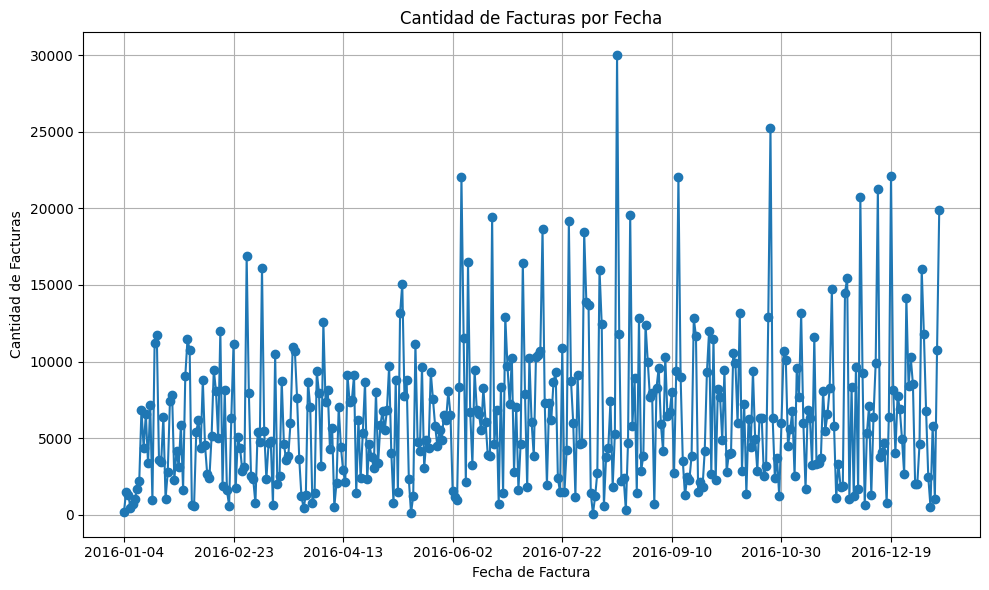

In [154]:
# Asegúrate de que la columna InvoiceDate esté en formato de fecha
df_DetallesCompras['ReceivingDate'] = pd.to_datetime(df_DetallesCompras['ReceivingDate'])

# Contar el número de registros por cada fecha de factura
invoice_counts = df_DetallesCompras.groupby('InvoiceDate').size()

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
invoice_counts.plot(kind='line', marker='o')

# Añadir títulos y etiquetas
plt.title('Cantidad de Facturas por Fecha')
plt.xlabel('Fecha de Factura')
plt.ylabel('Cantidad de Facturas')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Graficamos las ventas

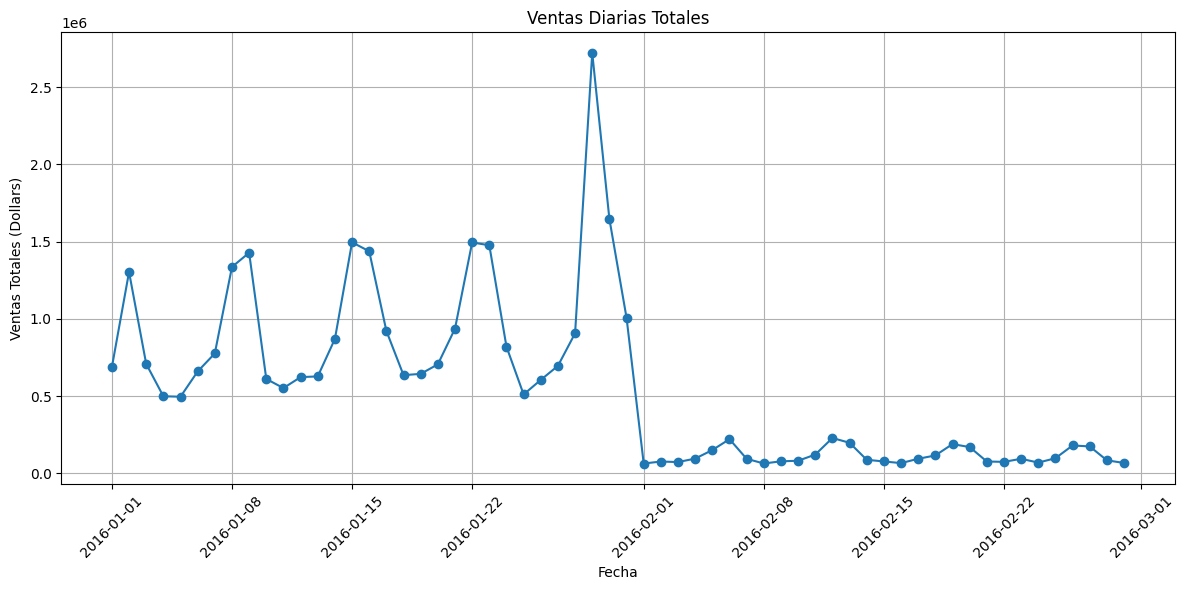

In [155]:
import matplotlib.pyplot as plt

# Asegurarnos de que la columna SalesDate esté en formato de fecha
df_SalesFINAL['SalesDate'] = pd.to_datetime(df_SalesFINAL['SalesDate'])

# Agrupar las ventas por fecha y sumar las ventas diarias
ventas_diarias = df_SalesFINAL.groupby('SalesDate')['SalesDollars'].sum().reset_index()

# Crear el gráfico de ventas diarias
plt.figure(figsize=(12, 6))
plt.plot(ventas_diarias['SalesDate'], ventas_diarias['SalesDollars'], marker='o')

# Configurar el título y las etiquetas del gráfico
plt.title('Ventas Diarias Totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (Dollars)')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se puede observar que solo se tienen datos del 1 de enero al 29 de febrero de 2016. Pero a su vez los datos de febreros muestran una fuerte variacion.

Analizamos los datos unicos en la fecha

In [156]:
# Asegurarnos de que la columna SalesDate esté en formato de fecha
df_SalesFINAL['SalesDate'] = pd.to_datetime(df_SalesFINAL['SalesDate'])

# Agrupar por día y sumar el total de SalesDollars por cada día
ventas_por_dia = df_SalesFINAL.groupby('SalesDate')['SalesDollars'].sum().reset_index()

# Mostrar el resultado
print(ventas_por_dia)



    SalesDate  SalesDollars
0  2016-01-01     687880.01
1  2016-01-02    1303610.64
2  2016-01-03     709085.36
3  2016-01-04     499567.87
4  2016-01-05     496719.05
5  2016-01-06     660150.82
6  2016-01-07     776881.62
7  2016-01-08    1336517.75
8  2016-01-09    1428520.90
9  2016-01-10     611492.80
10 2016-01-11     552554.14
11 2016-01-12     623496.79
12 2016-01-13     628019.10
13 2016-01-14     870579.08
14 2016-01-15    1495923.18
15 2016-01-16    1437986.56
16 2016-01-17     922572.72
17 2016-01-18     636162.08
18 2016-01-19     644563.58
19 2016-01-20     706044.78
20 2016-01-21     937047.99
21 2016-01-22    1494801.82
22 2016-01-23    1476966.64
23 2016-01-24     820625.74
24 2016-01-25     511295.33
25 2016-01-26     605394.93
26 2016-01-27     696374.14
27 2016-01-28     906992.96
28 2016-01-29    2721899.48
29 2016-01-30    1646970.94
30 2016-01-31    1007329.12
31 2016-02-01      64152.85
32 2016-02-02      77256.53
33 2016-02-03      73736.27
34 2016-02-04      9

In [157]:
df_SalesFINAL.shape[0]

1048575

In [158]:
# Asegurarnos de que la columna SalesDate esté en formato de fecha
df_SalesFINAL['SalesDate'] = pd.to_datetime(df_SalesFINAL['SalesDate'])

# Contar las fechas únicas en la columna SalesDate
fechas_unicas = df_SalesFINAL['SalesDate'].nunique()

# Mostrar el resultado
print(f"El número de fechas únicas en 'SalesDate' es: {fechas_unicas}")


El número de fechas únicas en 'SalesDate' es: 60


In [159]:
import numpy as np

# Asegurarnos de que la columna SalesDate esté en formato de fecha
df_SalesFINAL['SalesDate'] = pd.to_datetime(df_SalesFINAL['SalesDate'])

# Obtener las fechas únicas
fechas_unicas = df_SalesFINAL['SalesDate'].unique()

# Ordenar las fechas únicas utilizando numpy
fechas_unicas_sorted = np.sort(fechas_unicas)

# Mostrar el listado de fechas únicas ordenadas
print(f"Listado de fechas únicas en 'SalesDate':\n{fechas_unicas_sorted}")


Listado de fechas únicas en 'SalesDate':
['2016-01-01T00:00:00.000000000' '2016-01-02T00:00:00.000000000'
 '2016-01-03T00:00:00.000000000' '2016-01-04T00:00:00.000000000'
 '2016-01-05T00:00:00.000000000' '2016-01-06T00:00:00.000000000'
 '2016-01-07T00:00:00.000000000' '2016-01-08T00:00:00.000000000'
 '2016-01-09T00:00:00.000000000' '2016-01-10T00:00:00.000000000'
 '2016-01-11T00:00:00.000000000' '2016-01-12T00:00:00.000000000'
 '2016-01-13T00:00:00.000000000' '2016-01-14T00:00:00.000000000'
 '2016-01-15T00:00:00.000000000' '2016-01-16T00:00:00.000000000'
 '2016-01-17T00:00:00.000000000' '2016-01-18T00:00:00.000000000'
 '2016-01-19T00:00:00.000000000' '2016-01-20T00:00:00.000000000'
 '2016-01-21T00:00:00.000000000' '2016-01-22T00:00:00.000000000'
 '2016-01-23T00:00:00.000000000' '2016-01-24T00:00:00.000000000'
 '2016-01-25T00:00:00.000000000' '2016-01-26T00:00:00.000000000'
 '2016-01-27T00:00:00.000000000' '2016-01-28T00:00:00.000000000'
 '2016-01-29T00:00:00.000000000' '2016-01-30T00:0

Logramos determinar que en definitiva solo hay 60 datos y corresponden del 1 de enero al 29 de febrero de 2016

Totalizamos los valores de ventas por mes

In [160]:
# Asegurarnos de que la columna SalesDate esté en formato de fecha
df_SalesFINAL['SalesDate'] = pd.to_datetime(df_SalesFINAL['SalesDate'])

# Filtrar las ventas solo para el mes de enero
ventas_enero = df_SalesFINAL[df_SalesFINAL['SalesDate'].dt.month == 1]

# Filtrar las ventas solo para el mes de febrero
ventas_febrero = df_SalesFINAL[df_SalesFINAL['SalesDate'].dt.month == 2]

# Sumar el total de ventas en enero
total_ventas_enero = ventas_enero['SalesDollars'].sum()

# Sumar el total de ventas en febrero
total_ventas_febrero = ventas_febrero['SalesDollars'].sum()

print(f"El valor total de ventas durante el mes de enero es: $ {total_ventas_enero:,.2f}")
print(f"El valor total de ventas durante el mes de febrero es: $ {total_ventas_febrero:,.2f}")


El valor total de ventas durante el mes de enero es: $ 29,854,027.92
El valor total de ventas durante el mes de febrero es: $ 3,285,347.37



Se ha detectado una variación considerable en las cifras de ventas entre los meses de enero y febrero, lo que, junto con la ausencia de datos en los meses restantes, sugiere una posible falta de integridad y precisión en los registros evaluados. Esta situación pone en duda la fiabilidad de la información disponible.

### Analisis del Portafolio (Productos)

In [161]:
df_Productos=pd.read_csv('2017PurchasePricesDec.csv',sep=',')

Determinamos la cantidad de productos que ofrece ComerLogistics

In [162]:
Portafolio=df_Productos['Brand'].nunique()
Portafolio

12261

La cantidad de productos que ComerLogistics tiene listado en su portafolio es de 12261

Listado de productos en el inventario inicial

In [163]:
PortafolioInicial=df_BegInvFINAL['MarcaID'].nunique()
PortafolioInicial

8094

La empresa contaba con 8094 tipos de productos, del total de 12261 en us inventario inicial

Productos manejados durante el año

In [164]:
# Paso 1: Extraer las columnas 'Brand' de cada DataFrame
brand_inicial = df_BegInvFINAL['MarcaID']

brand_compras = df_DetallesCompras['Brand']

# Paso 2: Unir todas las columnas 'Brand' en un solo DataFrame
all_brands = pd.concat([brand_inicial, brand_compras])

# Paso 3: Obtener los valores únicos
unique_brands = all_brands.unique()

# Paso 4: Contar el número total de valores únicos
total_unique_brands = len(unique_brands)

# Mostrar el resultado
print(f"El número total de marcas únicas es: {total_unique_brands}")

El número total de marcas únicas es: 11485


La empresa manejo 11485 tipos de productos del total de 12261 de su portafolio.

Verifique con cuantas marcas de productos contamos en el inventario final

In [165]:
PortafolioFinal=df_EndInvFINAL['MarcaID'].nunique()
print(f"De un total {total_unique_brands} marcas que manejo la compañia durante el año, en al final estaban disponibles {PortafolioFinal}")

De un total 11485 marcas que manejo la compañia durante el año, en al final estaban disponibles 9653


Este dato nos indica que seguramente la compañia sufrio de desabastecimiento al menos al final.

-----